In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ncx2, norm

In [18]:
def gaussian_pdf(x, mu=0, sigma=1):
    v = sigma**2
    return (1/np.sqrt(2 * np.pi * v)) * np.exp(-0.5 * ((x-mu)**2) / v)

def exponential_pdf(x, lambda_=1):
    y = np.zeros(len(x))
    y[x > 0] = lambda_ * np.exp(- lambda_ * x[x > 0])
    return y

def log_normal_pdf(x, mu=0, sigma=1):
    v = sigma**2
    return (1 / (x * np.sqrt(2 * np.pi * v))) * np.exp(-0.5 * ((np.log(x)-mu)**2) / v)


def noncentral_chi_squarred_pdf(x, df=2, nc=1):
    '''
    Parameters for the noncentral chi-squared distribution
    df = degrees of freedom
    nc = noncentrality parameter
    x need to have positive values
    
    '''
    
    return ncx2.pdf(x, df, nc)
    

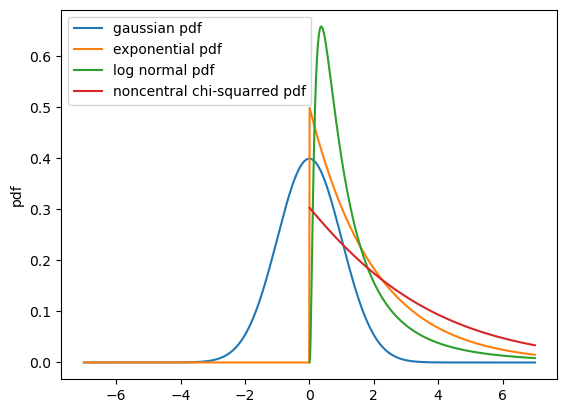

In [22]:
x = np.linspace(-7, 7, 1000)
# Warning: log normal pdf and noncentral chi-squarred pdf need a positive support for x
x_plus = x[x > 0]
y_gaussian = gaussian_pdf(x)
y_exponential = exponential_pdf(x, 0.5)
y_log_normal = log_normal_pdf(x_plus)
y_noncentral_chi_squarred = noncentral_chi_squarred_pdf(x_plus)

plt.plot(x, y_gaussian, label='gaussian pdf')
plt.plot(x, y_exponential, label='exponential pdf')
plt.plot(x_plus, y_log_normal, label='log normal pdf')
plt.plot(x_plus, y_noncentral_chi_squarred, label='noncentral chi-squarred pdf')

plt.ylabel('pdf')
plt.legend()
plt.show()

In [67]:
def normal_cdf(N, M, w):
    # x axis
    x = np.linspace(-M, +M, N * 2)
    # dx
    dx = x[1] - x[0]

    f = w * gaussian_pdf(x) * dx

    F = np.zeros(N * 2)
    for i, s in enumerate(x):
        # way to implement a comulative sum
        F[i] = np.sum(f[x <= s])
        
    return f, F

In [59]:
#number of samples
N = 1000
M = 5

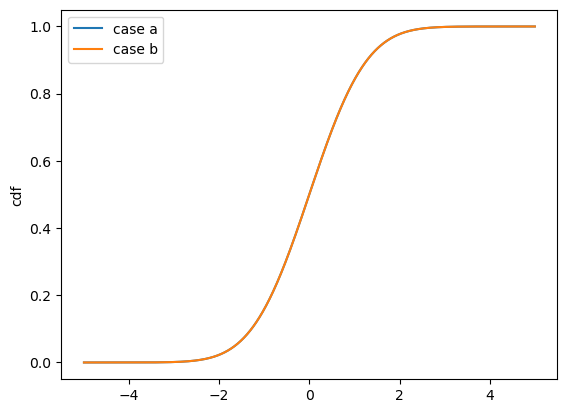

In [60]:
#weights
w = np.ones(N * 2)
w[0] = 0

x = np.linspace(-M, +M, N * 2)
f, F_b = normal_cdf(N, M, w)

plt.plot(x, np.cumsum(f), label='case a')
plt.plot(x, F_b, label='case b')

plt.legend()
plt.ylabel('cdf')
plt.show()

### c) trapezoidal rule

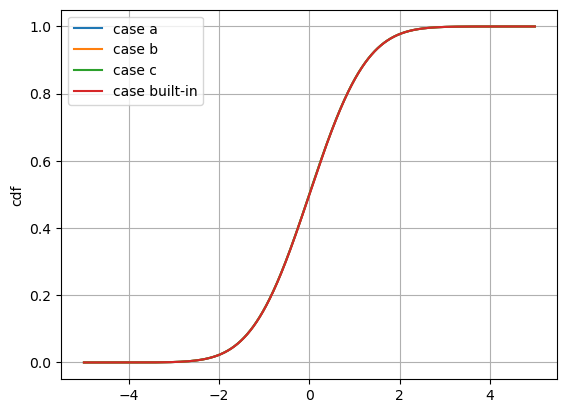

In [66]:
#weights
w_c = np.ones(N * 2)
w_c[0] = 0.5

f_c, F_c = normal_cdf(N, M, w_c)

plt.plot(x, np.cumsum(f), label='case a')
plt.plot(x, F_b, label='case b')
# trapezoidal rule
plt.plot(x, F_c, label='case c')
# built-in 
plt.plot(x, norm.cdf(x), label='case built-in')

plt.grid()
plt.legend()
plt.ylabel('cdf')
plt.show()